## Hypothesis
To predict the incentive level requested for lowering thermostat settings for 2-3F 
    when being at home in winter.
    
DV: IncHomeW    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeW, EnergyC, MC, ComfNW, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [37]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
#table(survey$Job)
#table(survey$Political)
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HomeW"       "HouseholdS"  "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "OwnRent"     "PBC1"        "PBC2"       
 [81] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [86] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [91] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [96] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[101] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[106] "Winter_avgC" "Winter_avgF" "X.9to5"

In [38]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [39]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeS", "AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 103
[1] 490 103


In [40]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeW",
"Winter_avgF")

In [41]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeW"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC1"        "PBC2"       
 [76] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [81] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [86] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [91] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
 [96] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[101] "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "ComfNW"      "Educ"        "EnergyC"    
 [6] "Ethnic"      "Frugal"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeW"       "HouseholdS"  "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "PBC"         "Political"   "SN"          "SqftCate"   
[21] "SubNorm"     "Trust"       "Winter_avgF"

In [42]:
data1 <- data2[, which(names(data2) %in% c("IncHomeW",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "ComfNW"      "Educ"        "EnergyC"    
 [6] "Ethnic"      "Gender"      "HabitC"      "HabitG"      "HomeW"      
[11] "HouseholdS"  "IncHomeW"    "Income"      "Latitude"    "MC"         
[16] "OwnRent"     "Political"   "SN"          "SqftCate"    "SubNorm"    
[21] "Winter_avgF"

In [43]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [44]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [45]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeW"       "IncHomeW"    "Age"         "Gender"      "OwnRent"    
 [6] "SqftCate"    "HouseholdS"  "Political"   "Ethnic"      "Income"     
[11] "Educ"        "Latitude"    "EnergyC"     "MC"          "ComfNW"     
[16] "Atti"        "SubNorm"     "SN"          "HabitG"      "HabitC"     
[21] "Winter_avgF"

In [46]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [47]:
#convert all data to numeric values

sapply(data2,sd)

HomeW    IncHomeW         Age      Gender     OwnRent    SqftCate 
       3.36        4.62       11.23        0.50        0.51        1.13 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.21        0.85        0.35        1.98        1.12        5.09 
    EnergyC          MC      ComfNW        Atti     SubNorm          SN 
       1.39        1.08        1.71        1.08        1.34        1.40 
     HabitG      HabitC Winter_avgF 
       1.16        1.38       11.43

In [48]:
hiCor(data2,.7)

,Latitude,Winter_avgF
Latitude,1.00,-0.85
Winter_avgF,-0.85,1.00


In [49]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    Gender EnergyC    MC  Atti SubNorm    SN HabitG HabitC
PC1  -0.21   -0.42 -0.34 -0.45   -0.38 -0.22  -0.31  -0.26
[1] 0.24
     Age OwnRent SqftCate HouseholdS Income
PC2 0.34    0.48     0.49       0.23   0.42
[1] 0.35
    HomeW HouseholdS Ethnic Latitude ComfNW HabitC Winter_avgF
PC3  0.44       0.21  -0.24    -0.46   0.28  -0.25        0.48
[1] 0.42
    Gender HouseholdS Educ Latitude ComfNW HabitC Winter_avgF
PC4  -0.27      -0.38 0.21    -0.46  -0.41    0.2        0.43
[1] 0.48
    Political Ethnic Income Educ EnergyC HabitG HabitC
PC5      0.55  -0.22    0.3 0.41    0.25  -0.35  -0.23
[1] 0.54
    IncHomeW  Age HouseholdS Ethnic   SN
PC6     0.56 0.46      -0.32   0.23 -0.3
[1] 0.59
    HomeW IncHomeW   Age Gender Political Educ   MC SubNorm   SN
PC7  0.22     0.32 -0.26  -0.62     -0.28 0.23 0.24    0.23 0.22
[1] 0.64
    IncHomeW HouseholdS  Educ ComfNW
PC8     0.54       0.22 -0.42  -0.49
[1] 0.68
    Ethnic    MC  Atti SubNorm   SN HabitG
PC9   0.46 -0.34 -0.22  

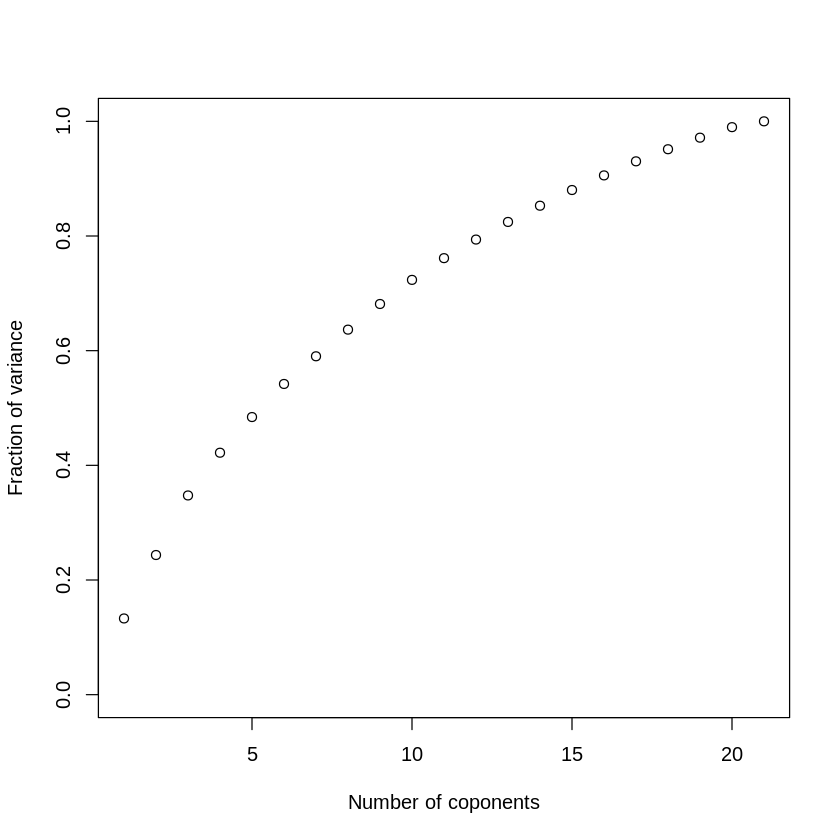

In [50]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [51]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [52]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Winter_avgF,21,0.62
Latitude,12,0.61
SqftCate,6,0.42
Atti,16,0.42
EnergyC,13,0.39
OwnRent,5,0.35
Income,10,0.30
SubNorm,17,0.27
HouseholdS,7,0.26
HabitC,20,0.25
MC,14,0.23


In [53]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeW    IncHomeW         Age      Gender     OwnRent    SqftCate 
       0.91        1.00        1.00        0.92        0.99        0.99 
 HouseholdS   Political      Ethnic      Income        Educ    Latitude 
       1.00        0.94        0.95        0.99        0.97        0.30 
    EnergyC          MC      ComfNW        Atti     SubNorm          SN 
       0.53        0.77        0.99        0.44        0.73        0.92 
     HabitG      HabitC Winter_avgF 
       0.84        0.89        0.15 

Loadings:
            Factor1 Factor2
EnergyC      0.69          
Atti         0.75          
SubNorm      0.52          
Latitude            -0.83  
Winter_avgF          0.92  
HomeW                      
IncHomeW                   
Age                        
Gender                     
OwnRent                    
SqftCate                   
HouseholdS                 
Political                  
Ethnic  

In [54]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [55]:
#Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
#    Latitude, HomeW, EnergyC, MC, ComfNW, HabitC, Winter_avgF

In [56]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'HomeW', 'EnergyC', 'MC', 'ComfNW', 'HabitC', 'Winter_avgF')

In [57]:
fmla <- as.formula(paste("IncHomeW",paste(IndepPred,collapse="+"),sep="~"));

In [58]:
table(data2[,"IncHomeW"])


  1   2   3   4   5   6   7   8  99 
 32  33  66 167  62  59  46  24   1 

In [59]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.70  -1.49  -0.21   1.08  89.56 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.3644     6.5753    0.06   0.9558   
Age           0.0232     0.0205    1.13   0.2594   
Gender       -0.6418     0.4533   -1.42   0.1575   
OwnRent       0.9606     0.4960    1.94   0.0534 . 
SqftCate      0.1468     0.2389    0.61   0.5392   
HouseholdS   -0.2395     0.1974   -1.21   0.2257   
Political    -0.0302     0.2630   -0.11   0.9085   
Ethnic       -0.0478     0.6149   -0.08   0.9381   
Income       -0.3107     0.1232   -2.52   0.0120 * 
Educ         -0.1109     0.2008   -0.55   0.5810   
Latitude      0.0439     0.0650    0.68   0.4999   
HomeW         0.0380     0.0739    0.51   0.6069   
EnergyC       0.1831     0.1657    1.11   0.2697   
MC            0.2454     0.2034    1.21   0.2282   
ComfNW        0.1086     0.1400    0.78   0.4383   
HabitC       -0.4538     0.16

In [60]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.6e+01,46.250,2.2241,0.1365
Gender,1,1.6e+01,16.357,0.7866,0.3756
OwnRent,1,2.7e+01,27.210,1.3085,0.2532
SqftCate,1,8.6e+00,8.637,0.4153,0.5196
HouseholdS,1,1.4e+01,14.269,0.6862,0.4079
Political,1,1.1e-01,0.106,0.0051,0.9431
Ethnic,1,2.8e+00,2.783,0.1338,0.7147
Income,1,1.8e+02,176.871,8.5055,0.0037
Educ,1,1.7e+01,16.761,0.8060,0.3698
Latitude,1,3.2e-02,0.032,0.0015,0.9687


In [61]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.820 -1.172 -0.213  1.152  3.907 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.07761    4.01373    0.27    0.789  
Age          0.00271    0.01086    0.25    0.803  
Gender       0.16110    0.23919    0.67    0.501  
OwnRent      0.38675    0.27878    1.39    0.167  
SqftCate     0.07611    0.12856    0.59    0.554  
HouseholdS  -0.09856    0.11199   -0.88    0.380  
Political   -0.00745    0.13728   -0.05    0.957  
Ethnic       0.49652    0.39250    1.27    0.207  
Income      -0.02189    0.06837   -0.32    0.749  
Educ         0.03999    0.10500    0.38    0.704  
Latitude     0.02241    0.04792    0.47    0.640  
HomeW        0.01111    0.04273    0.26    0.795  
EnergyC      0.01144    0.08598    0.13    0.894  
MC           0.06447    0.10497    0.61    0.540  
ComfNW       0.13075    0.07558    1.73    0.085 .
HabitC      -0.

In [62]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,4.414,4.414,1.3402,0.248
Gender,1,2.275,2.275,0.6907,0.407
OwnRent,1,6.238,6.238,1.8939,0.170
SqftCate,1,0.173,0.173,0.0526,0.819
HouseholdS,1,1.465,1.465,0.4448,0.505
Political,1,0.109,0.109,0.0331,0.856
Ethnic,1,4.259,4.259,1.2930,0.257
Income,1,0.101,0.101,0.0307,0.861
Educ,1,0.023,0.023,0.0069,0.934
Latitude,1,0.687,0.687,0.2087,0.648


In [68]:
mod = lm(fmla,data=data2,subs=data2$Winter_avgF<30)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avgF < 
    30)

Residuals:
   Min     1Q Median     3Q    Max 
-4.189 -1.182 -0.157  1.289  4.390 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.97839    4.85971   -0.20    0.841  
Age         -0.00925    0.01395   -0.66    0.508  
Gender       0.41252    0.32948    1.25    0.213  
OwnRent      0.63649    0.38256    1.66    0.098 .
SqftCate     0.18477    0.17193    1.07    0.284  
HouseholdS   0.08782    0.15076    0.58    0.561  
Political    0.06129    0.18690    0.33    0.743  
Ethnic       0.36476    0.64518    0.57    0.573  
Income      -0.20829    0.10065   -2.07    0.040 *
Educ         0.15733    0.14243    1.10    0.271  
Latitude     0.01321    0.04196    0.31    0.753  
HomeW        0.05363    0.05848    0.92    0.361  
EnergyC     -0.01184    0.12371   -0.10    0.924  
MC           0.09481    0.13614    0.70    0.487  
ComfNW       0.02488    0.09858    0.25    0.801  
HabitC 

In [64]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,8.4e-02,0.0844,0.0248,0.875
Gender,1,1.0e+01,10.3329,3.0392,0.083
OwnRent,1,1.0e+01,10.0520,2.9566,0.088
SqftCate,1,2.5e+00,2.4727,0.7273,0.395
HouseholdS,1,1.2e+00,1.1637,0.3423,0.559
Political,1,1.5e-02,0.0146,0.0043,0.948
Ethnic,1,1.3e+00,1.2573,0.3698,0.544
Income,1,1.1e+01,11.2383,3.3055,0.071
Educ,1,2.2e+00,2.1561,0.6342,0.427
Latitude,1,5.9e-01,0.5911,0.1738,0.677
